In [2]:
import nltk
nltk.download('all')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer



[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import plotly.express as px
import seaborn as sns
import re
from sklearn.feature_extraction.text import CountVectorizer
from nltk import FreqDist
from wordcloud import WordCloud
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from sklearn.decomposition import PCA
import spacy
from IPython.display import IFrame
from gensim import corpora, models

import warnings
import os
import random

In [4]:
import warnings
from google.colab import files
uploaded = files.upload()

Saving lyrics.csv to lyrics.csv


In [5]:
df = pd.read_csv('lyrics.csv')
df = df.drop(columns = ['artist','year'])
print(df.head())
print(df.tail())
print(df.info())
print(df.describe())

         date         album  track_n track_title  line  \
0  2006/10/24  Taylor Swift        1  Tim McGraw     1   
1  2006/10/24  Taylor Swift        1  Tim McGraw     2   
2  2006/10/24  Taylor Swift        1  Tim McGraw     3   
3  2006/10/24  Taylor Swift        1  Tim McGraw     4   
4  2006/10/24  Taylor Swift        1  Tim McGraw     5   

                                         lyric  
0          He said the way my blue eyes shined  
1  Put those Georgia stars to shame that night  
2                        I said,"That's a lie"  
3                  Just a boy in a Chevy truck  
4         That had a tendency of gettin' stuck  
     date     album  track_n      track_title  line  \
7876  NaN  evermore       17  It's Time to Go    50   
7877  NaN  evermore       17  It's Time to Go    51   
7878  NaN  evermore       17  It's Time to Go    52   
7879  NaN  evermore       17  It's Time to Go    53   
7880  NaN  evermore       17  It's Time to Go    54   

                          

In [6]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because",
                       "could've": "could have", "couldn't": "could not", "didn't": "did not",
                       "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not",
                       "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is",
                       "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                       "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have",
                       "I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have",
                       "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have",
                       "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will",
                       "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                       "mayn't": "may not", "might've": "might have","mightn't": "might not",
                       "mightn't've": "might not have", "must've": "must have", "mustn't": "must not",
                       "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
                       "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have",
                       "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                       "she'd": "she would", "she'd've": "she would have", "she'll": "she will",
                       "she'll've": "she will have", "she's": "she is", "should've": "should have",
                       "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have",
                       "so's": "so as", "this's": "this is","that'd": "that would",
                       "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                       "there'd've": "there would have", "there's": "there is", "here's": "here is",
                       "they'd": "they would", "they'd've": "they would have", "they'll": "they will",
                       "they'll've": "they will have", "they're": "they are", "they've": "they have",
                       "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have",
                       "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have",
                       "weren't": "were not", "what'll": "what will", "what'll've": "what will have",
                       "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is",
                       "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have",
                       "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                       "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not",
                       "won't've": "will not have", "would've": "would have", "wouldn't": "would not",
                       "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                       "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                       "you'd": "you would", "you'd've": "you would have", "you'll": "you will",
                       "you'll've": "you will have", "you're": "you are", "you've": "you have" ,
                       "Isn't":"is not", "\u200b":"", "It's": "it is","I'm": "I am","don't":"do not","did't":"did not","ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have",
                       "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not",
                       "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did",
                       "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will",
                       "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",
                       "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have",
                       "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not",
                       "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                       "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
                       "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
                       "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have",
                       "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have",
                       "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                       "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is",
                       "there'd": "there would", "there'd've": "there would have", "there's": "there is",
                       "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have",
                       "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have",
                       "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will",
                       "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have",
                       "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is",
                       "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                       "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have" }

In [7]:
def expand_contractions(text, contraction_mapping):
    # Function to expand contractions in a text using a mapping
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        expanded_contraction = contraction_mapping.get(match) if contraction_mapping.get(match) else contraction_mapping.get(match.lower())
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

# Apply contraction expansion to the 'lyrics' column
df['lyric'] = df['lyric'].apply(lambda x: expand_contractions(x, contraction_mapping))

In [8]:
# Lowercasing
df['lyric'] = df['lyric'].str.lower()

# Removing Punctuation and Special Characters

df['lyric'] = df['lyric'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Removing Stop Words
stop_words = set(stopwords.words('english'))
df['lyric'] = df['lyric'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Tokenization
df['tokens'] = df['lyric'].apply(word_tokenize)

# Lemmatization (Optional)
lemmatizer = WordNetLemmatizer()
df['lemmas'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


# Removing Duplicates
df = df.drop_duplicates(subset=['lyric'])

print(df.head())
print(df.tail())
print(df.info())
print(df.describe())

         date         album  track_n track_title  line  \
0  2006/10/24  Taylor Swift        1  Tim McGraw     1   
1  2006/10/24  Taylor Swift        1  Tim McGraw     2   
2  2006/10/24  Taylor Swift        1  Tim McGraw     3   
3  2006/10/24  Taylor Swift        1  Tim McGraw     4   
4  2006/10/24  Taylor Swift        1  Tim McGraw     5   

                           lyric                               tokens  \
0      said way blue eyes shined      [said, way, blue, eyes, shined]   
1  put georgia stars shame night  [put, georgia, stars, shame, night]   
2                   saidthat lie                      [saidthat, lie]   
3                boy chevy truck                  [boy, chevy, truck]   
4          tendency gettin stuck            [tendency, gettin, stuck]   

                               lemmas  
0      [said, way, blue, eye, shined]  
1  [put, georgia, star, shame, night]  
2                     [saidthat, lie]  
3                 [boy, chevy, truck]  
4           

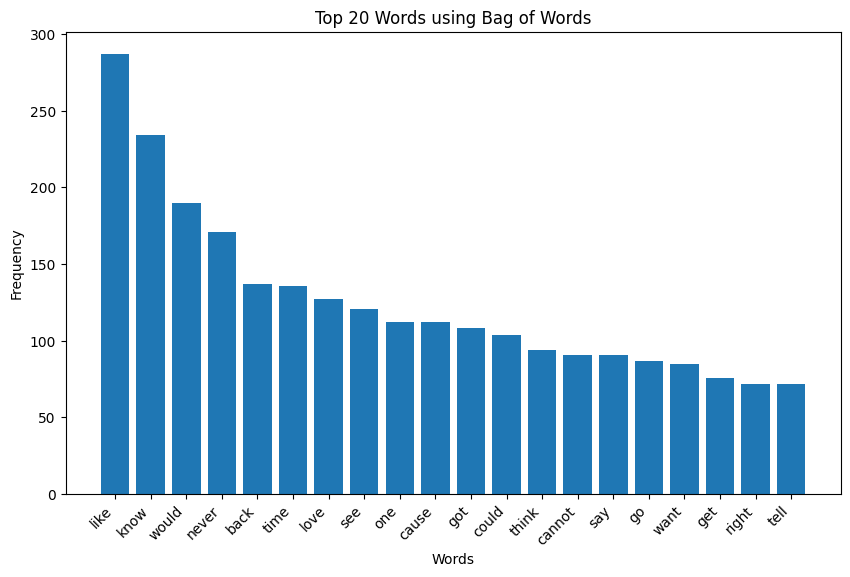

In [9]:
vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(df['lyric'])
# Convert to a Pandas DataFrame for better visualization
dtm_df = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names_out())
# print(dtm_df)

# Sum word frequencies across all documents
word_frequencies = dtm.sum(axis=0).A1

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame for better visualization
word_freq_df = pd.DataFrame({'Word': feature_names, 'Frequency': word_frequencies})
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

# Plot the top N words
top_words = word_freq_df.head(20)
plt.figure(figsize=(10, 6))
plt.bar(top_words['Word'], top_words['Frequency'])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Words using Bag of Words')
plt.xticks(rotation=45, ha='right')
plt.show()

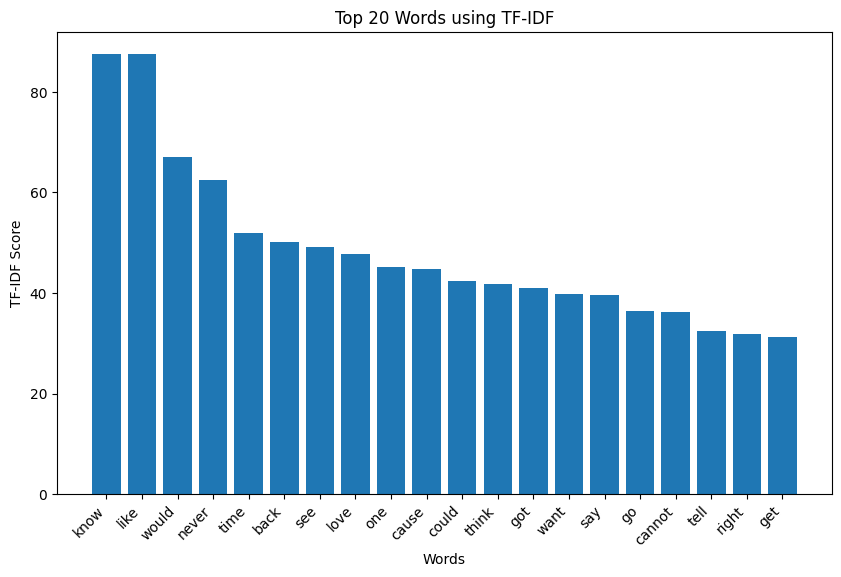

In [10]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['lyric'])

# Convert to a Pandas DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
# print(tfidf_df)

# Sum TF-IDF scores across all documents
tfidf_scores = tfidf_matrix.sum(axis=0).A1

# Create a DataFrame for better visualization
tfidf_df = pd.DataFrame({'Word': vectorizer.get_feature_names_out(), 'TF-IDF Score': tfidf_scores})
tfidf_df = tfidf_df.sort_values(by='TF-IDF Score', ascending=False)

# Plot the top N words
top_words_tfidf = tfidf_df.head(20)
plt.figure(figsize=(10, 6))
plt.bar(top_words_tfidf['Word'], top_words_tfidf['TF-IDF Score'])
plt.xlabel('Words')
plt.ylabel('TF-IDF Score')
plt.title('Top 20 Words using TF-IDF')
plt.xticks(rotation=45, ha='right')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25561 (\N{CJK UNIFIED IDEOGRAPH-63D9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


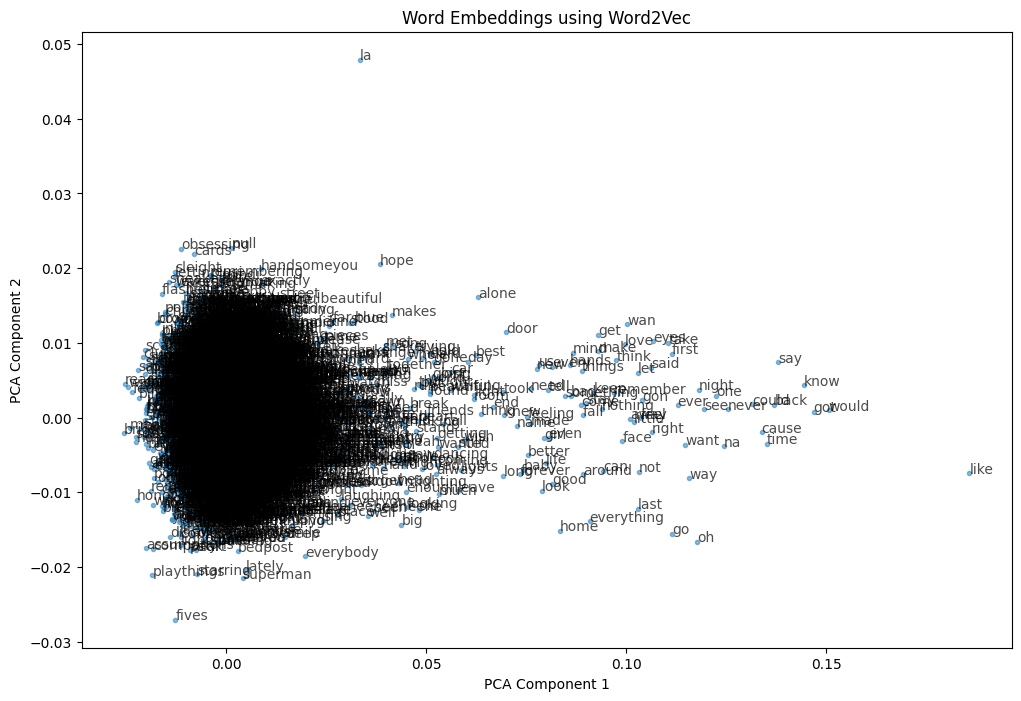

In [11]:
all_tokens = df['tokens'].sum()  # Combine all tokens into a single list
word2vec_model = Word2Vec(sentences=[all_tokens], vector_size=100, window=5, min_count=1, workers=4)

# Get word vectors and corresponding words
word_vectors = [word2vec_model.wv[word] for word in word2vec_model.wv.index_to_key]
words = [word for word in word2vec_model.wv.index_to_key]

# Use PCA to reduce dimensions for plotting
pca = PCA(n_components=2)
word_vectors_pca = pca.fit_transform(word_vectors)

# Create a DataFrame for better visualization
word_vectors_df = pd.DataFrame({'Word': words, 'PCA1': word_vectors_pca[:, 0], 'PCA2': word_vectors_pca[:, 1]})

# Plot the word embeddings
plt.figure(figsize=(12, 8))
plt.scatter(word_vectors_df['PCA1'], word_vectors_df['PCA2'], marker='.', alpha=0.5)
for i, word in enumerate(word_vectors_df['Word']):
    plt.annotate(word, (word_vectors_df['PCA1'][i], word_vectors_df['PCA2'][i]), alpha=0.7)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Word Embeddings using Word2Vec')
plt.show()

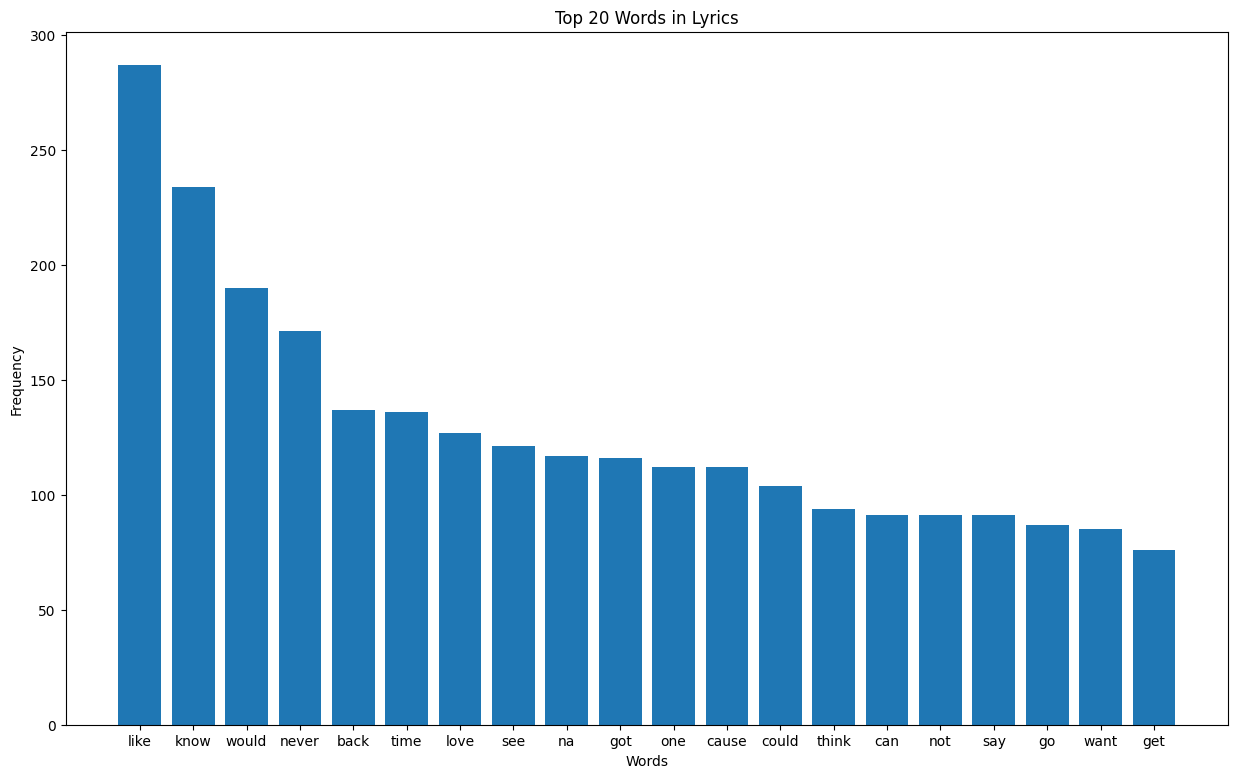

In [12]:
# Frequency
all_tokens = [token for tokens_list in df['tokens'] for token in tokens_list]

# Calculate word frequencies
fdist = FreqDist(all_tokens)

# Plot the top N words
plt.figure(figsize=(15, 9))
top_words = fdist.most_common(20)
plt.bar(*zip(*top_words))
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Words in Lyrics')
plt.show()

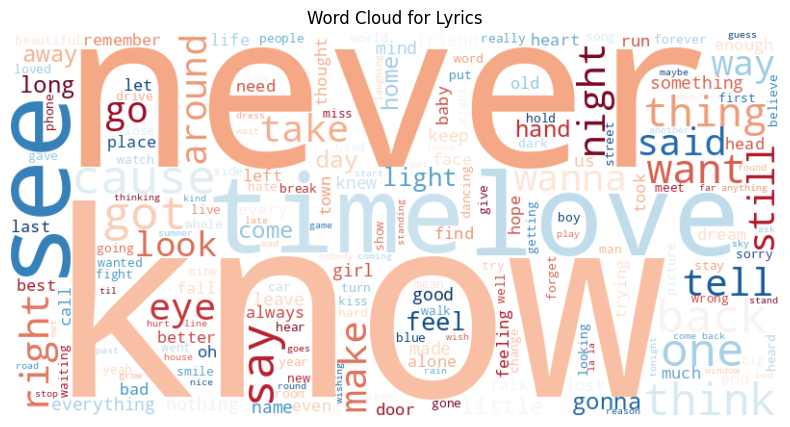

In [33]:
# Word Cloud
text = ' '.join(df['lyric'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white',colormap = 'RdBu').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Lyrics')
plt.show()

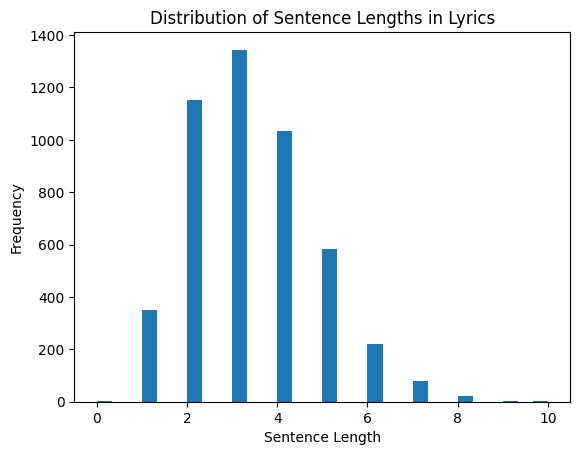

In [14]:
# distribution of sentence lenghts in lyrics
df['sentence_lengths'] = df['lyric'].apply(lambda x: len(x.split()))

# Plot the distribution of sentence lengths
plt.hist(df['sentence_lengths'], bins=30)
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sentence Lengths in Lyrics')
plt.show()

In [22]:
# Apply Latent Dirichlet Allocation
lda = LatentDirichletAllocation(n_components=9, random_state=42)
topics = lda.fit_transform(dtm)

# Display the top words for each topic
feature_names = vectorizer.get_feature_names_out()
for i, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-10-1:-1]
    top_words = [feature_names[idx] for idx in top_words_idx]
    print(f"Topic {i+1}: {', '.join(top_words)}")

Topic 1: like, would, night, every, made, know, us, car, back, nothing
Topic 2: time, tell, take, like, need, cannot, say, la, back, town
Topic 3: got, away, could, like, ever, good, bad, would, looking, love
Topic 4: want, right, like, see, wanted, leave, back, last, know, home
Topic 5: say, said, back, baby, beautiful, get, would, time, forever, remember
Topic 6: see, still, day, knew, would, face, first, feel, long, time
Topic 7: never, think, love, go, always, know, keep, would, get, girl
Topic 8: know, one, like, oh, things, cause, wanna, eyes, stay, thing
Topic 9: everything, cannot, way, trying, mine, something, fall, know, loved, lost


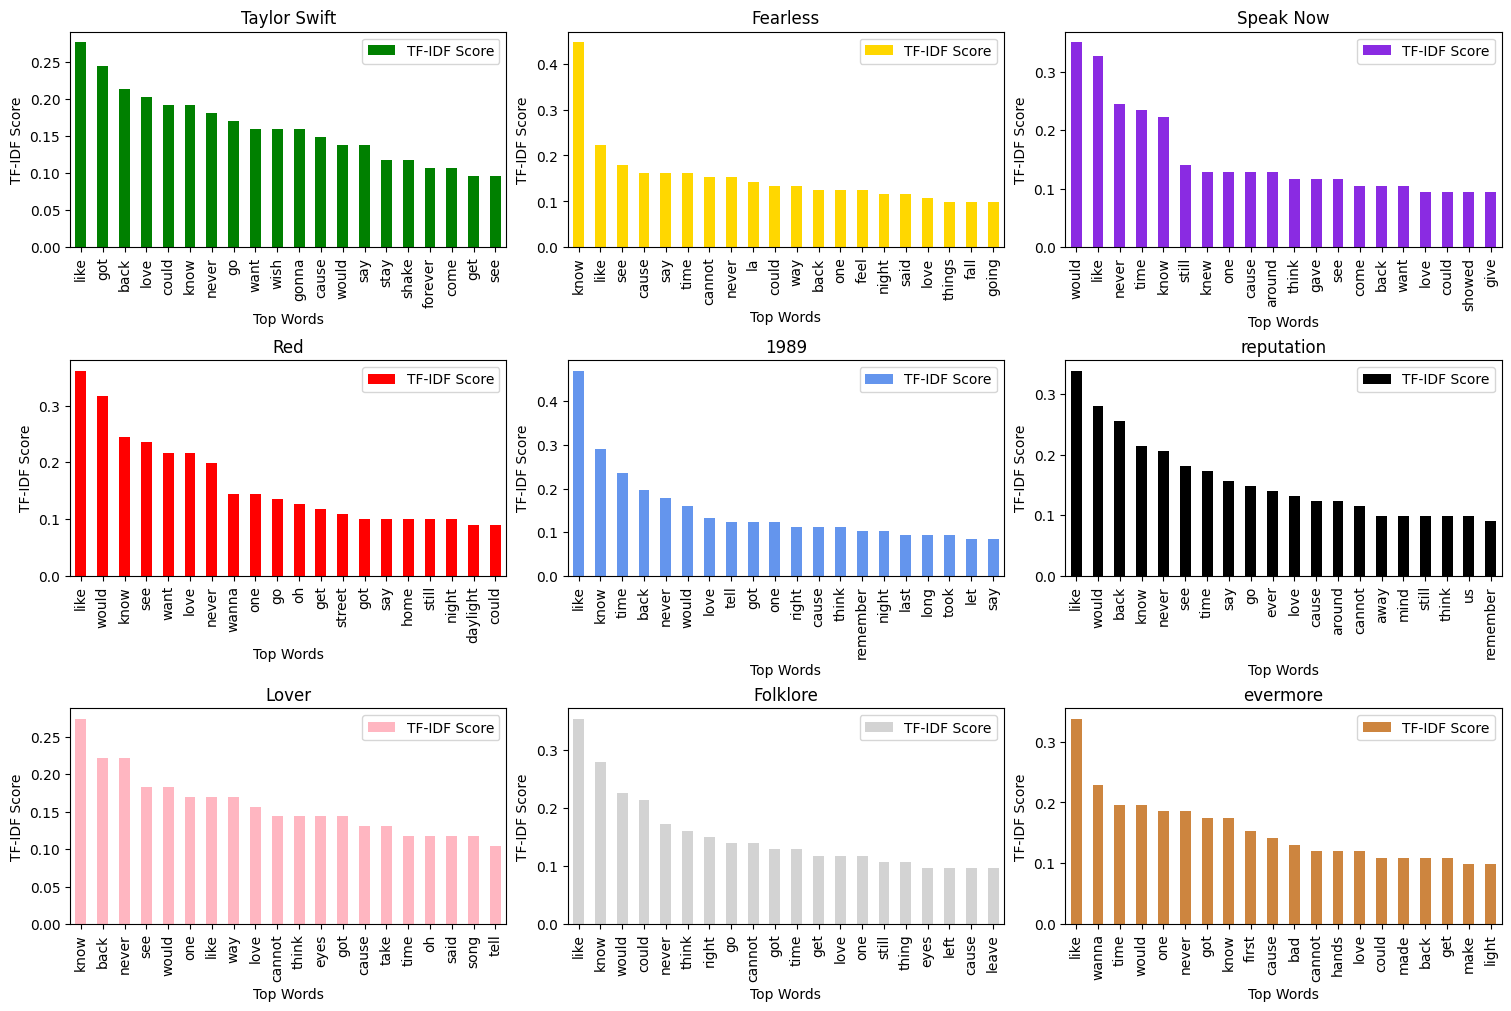

In [28]:
# Function to get the top words and their TF-IDF scores for each album
def get_top_words_tfidf(album_lyrics, max_features=20):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(album_lyrics)
    scores = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
    top_words = scores.mean().sort_values(ascending=False).index[:max_features]
    top_scores = scores[top_words].mean()
    return pd.DataFrame({'Word': top_words, 'TF-IDF Score': top_scores})

# Aggregate lyrics for each album
album_lyrics = df.groupby('album')['lyric'].apply(lambda x: ' '.join(x)).reset_index()

colors = ['green','gold','blueviolet','r','cornflowerblue','k','lightpink','lightgrey','peru']

# Plot the top 20 words and their TF-IDF scores for each album
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10), constrained_layout=True)
axes = axes.flatten()

for i, (album, lyrics) in enumerate(zip(df['album'].unique(), album_lyrics['lyric'])):
    top_words_tfidf = get_top_words_tfidf([lyrics])
    top_words_tfidf.plot(kind='bar', x='Word', y='TF-IDF Score', ax=axes[i], title=album ,color = colors[i])
    axes[i].set_xlabel('Top Words')
    axes[i].set_ylabel('TF-IDF Score')

plt.show()

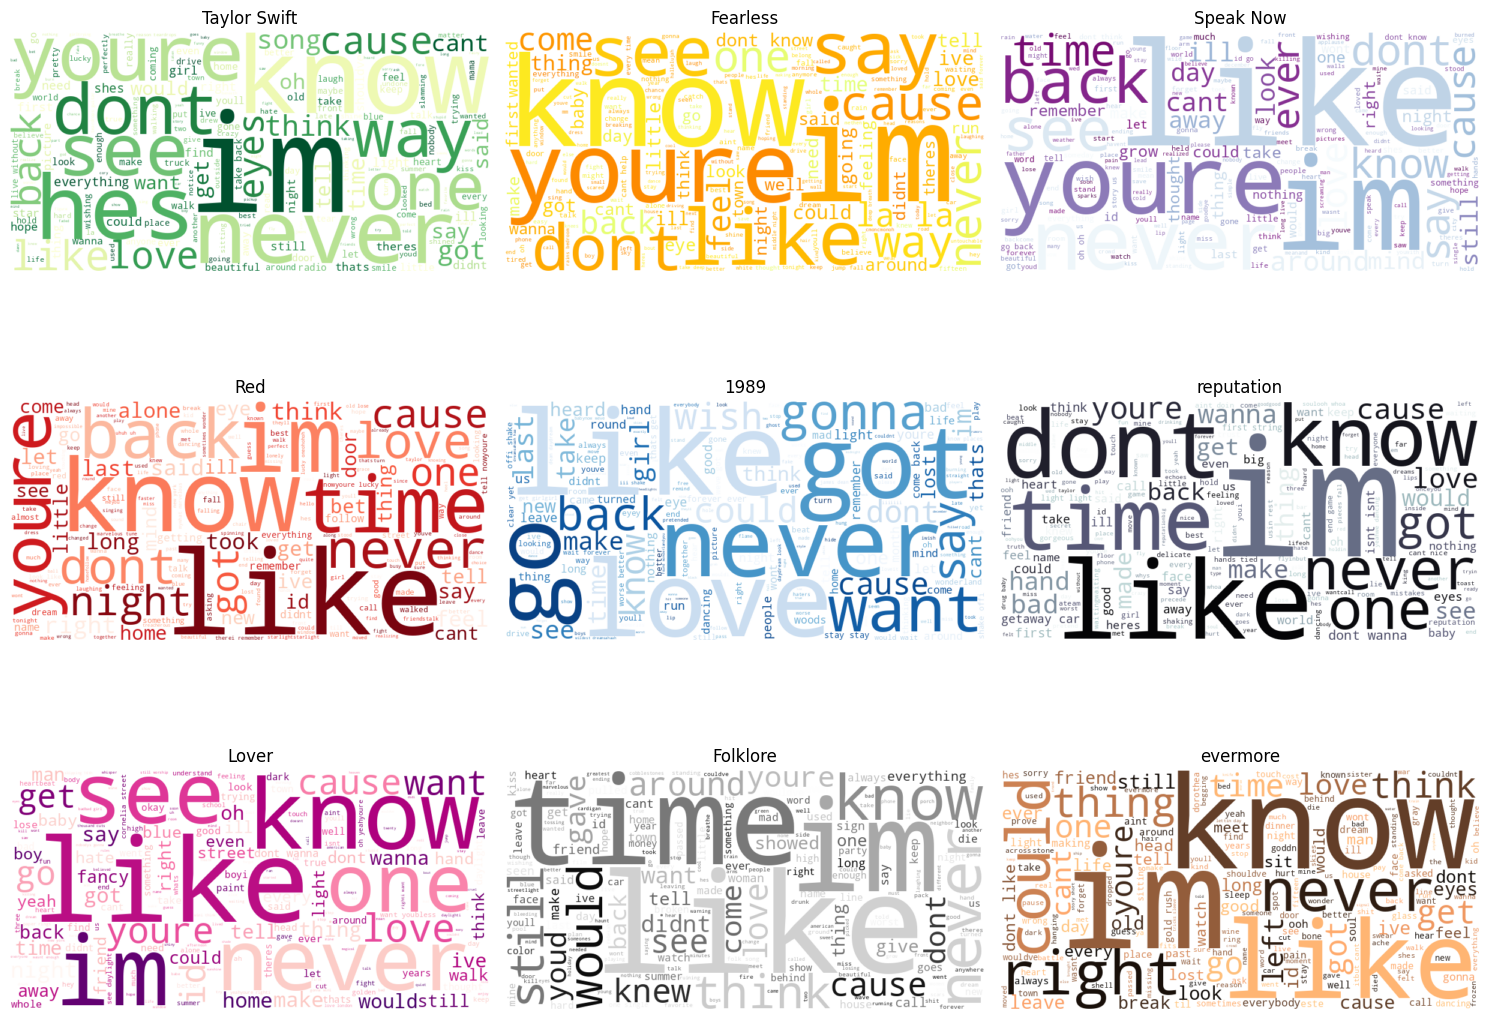

In [70]:
# Define the custom color palette
custom_palette = ['YlGn_r','Wistia','BuPu','Reds','Blues_r','bone','RdPu','gray_r','copper']

# Create subplots for each album
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12), sharex=True)

# Flatten the 3x3 array of subplots
axes = axes.flatten()

# Filter out unique album names
unique_albums = df['album'].unique()

for i, album in enumerate(unique_albums):
    # Extract lyrics for the current album
    album_lyrics = df[df['album'] == album]['lyric'].values

    # Combine lyrics into a single string
    all_lyrics = ' '.join(album_lyrics)

    # Generate a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words,colormap = custom_palette[i]).generate(all_lyrics)

    # Plot the word cloud with the custom color palette
    ax = axes[i]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(album)
    ax.axis('off')

# # Set the custom color palette for the entire plot
# sns.set_palette(sns.color_palette(custom_palette))

# Adjust layout
plt.tight_layout()
plt.show()


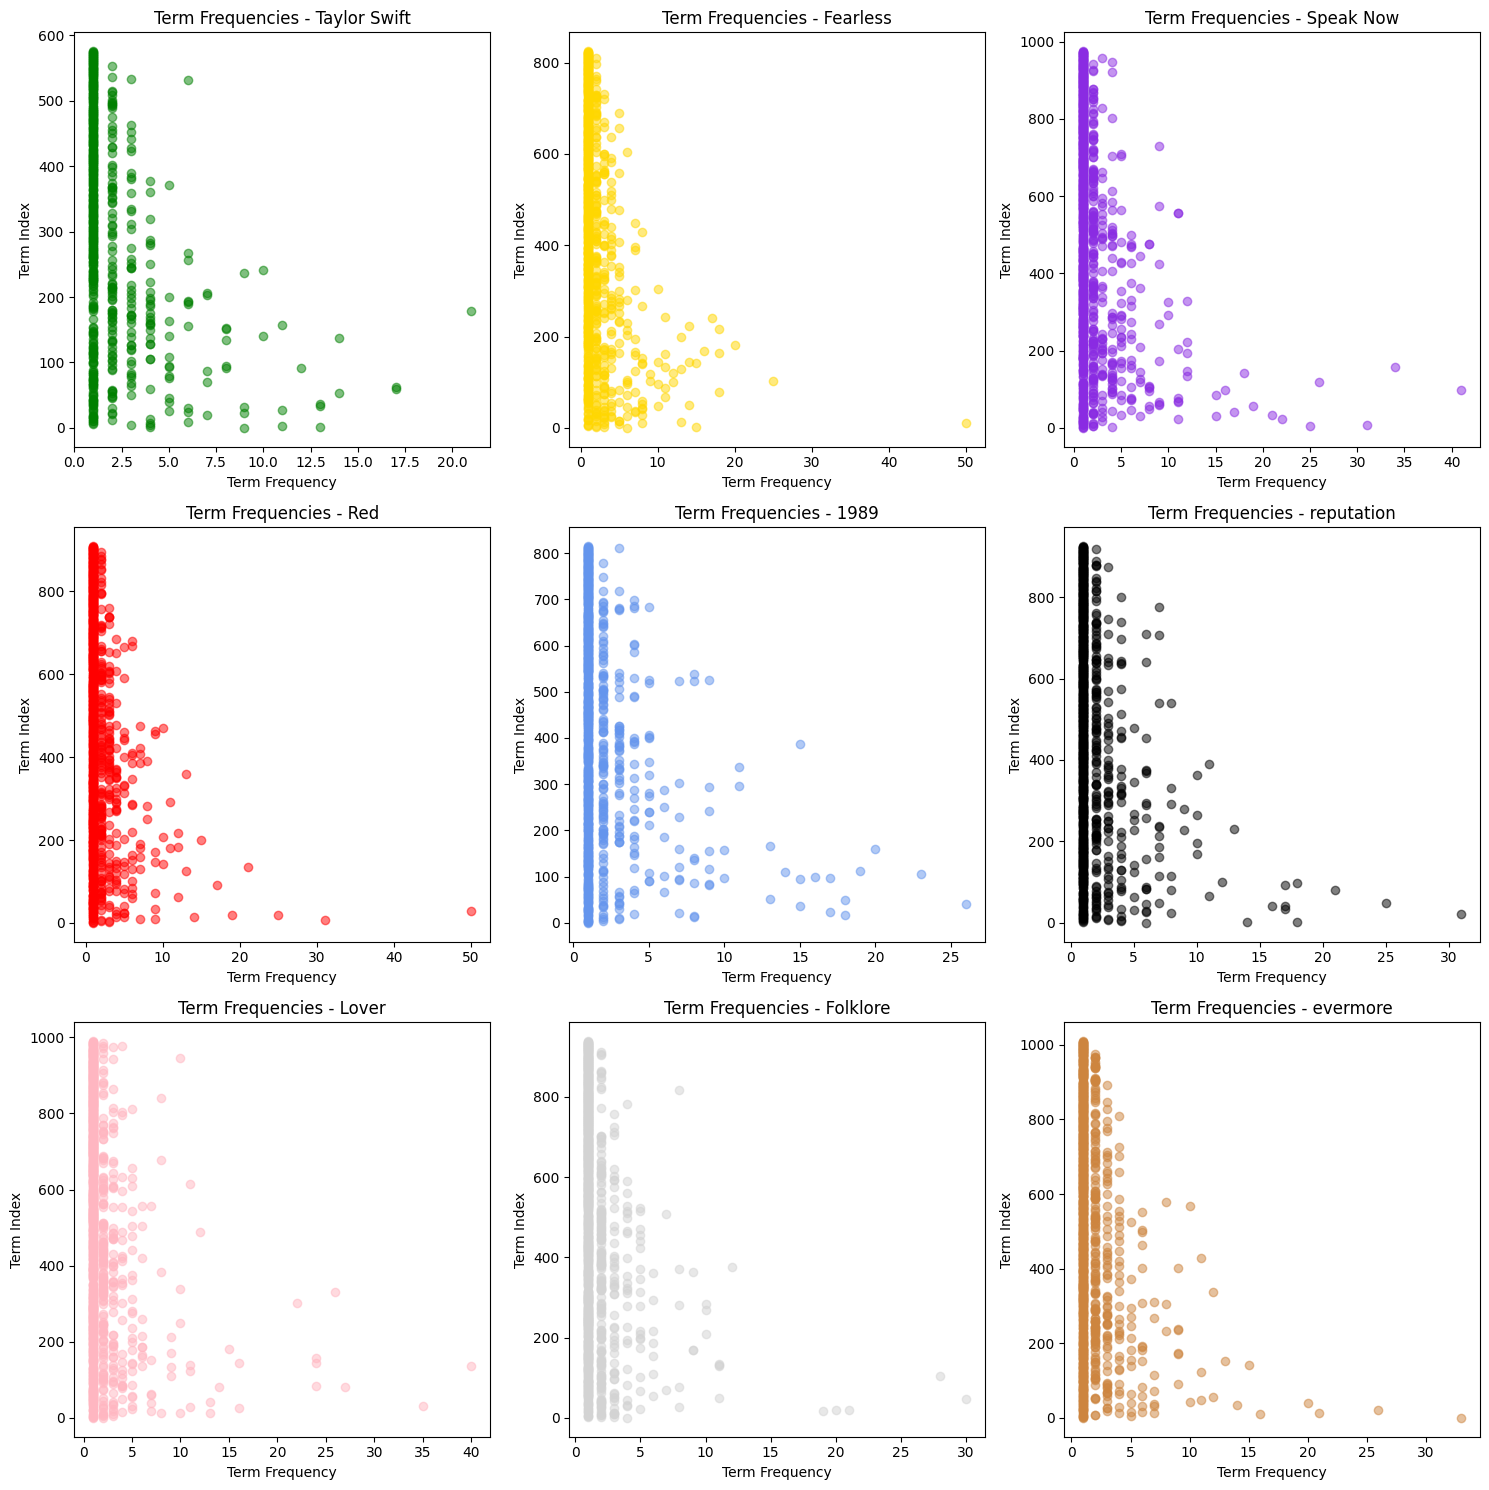

In [29]:
df['tokens'] = df['lyric'].apply(word_tokenize)

# Get a list of English stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords from the tokens
df['tokens'] = df['tokens'].apply(lambda tokens: [word.lower() for word in tokens if word.isalnum() and word.lower() not in stop_words])

# Get term frequencies for each album
albums = df['album'].unique()
term_freq_dfs = []

for album in albums:
    term_freq = FreqDist([term for tokens in df[df['album'] == album]['tokens'] for term in tokens])
    term_freq_df = pd.DataFrame({
        'Term': term_freq.keys(),
        f'Frequency_{album}': term_freq.values()
    })
    term_freq_dfs.append(term_freq_df)

# Combine term frequencies into a single DataFrame
combined_df = pd.concat(term_freq_dfs, axis=1)

# Plot subplots for each album
num_albums = len(albums)
num_cols = 3  # Adjust the number of columns in the subplot grid
num_rows = (num_albums + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

colors = ['green','gold','blueviolet','r','cornflowerblue','k','lightpink','lightgrey','peru']

for i, album in enumerate(albums):
    row, col = divmod(i, num_cols)
    ax = axes[row, col]

    ax.scatter(combined_df[f'Frequency_{album}'], range(len(combined_df)), alpha=0.5,color=colors[i])
    ax.set_title(f'Term Frequencies - {album}')
    ax.set_xlabel('Term Frequency')
    ax.set_ylabel('Term Index')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 25561 (\N{CJK UNIFIED IDEOGRAPH-63D9}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25561 (\N{CJK UNIFIED IDEOGRAPH-63D9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


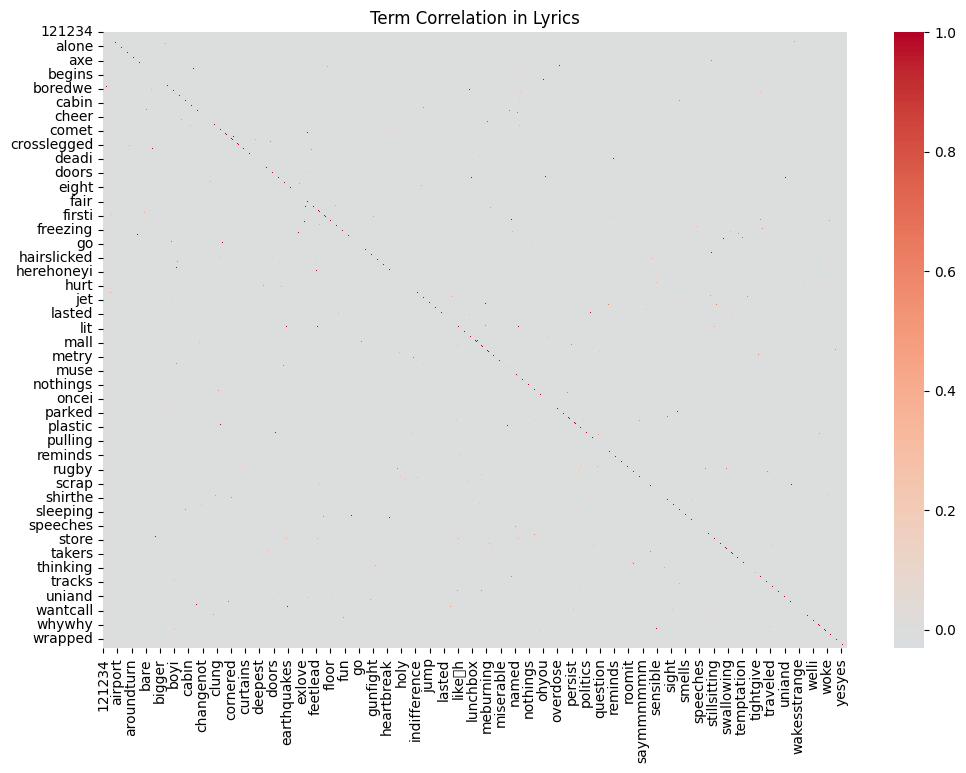

In [37]:
# Adjust the stop words based on your needs
stop_words = stopwords.words('english')

# Vectorize the lyrics using TF-IDF
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=5000)
tfidf_matrix = vectorizer.fit_transform(df['lyric'])

# Convert TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Calculate the correlation matrix
correlation_matrix = tfidf_df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", center=0, annot=False)
plt.title('Term Correlation in Lyrics')
plt.show()

//
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['lyric'])

# Convert to a Pandas DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
# print(tfidf_df)

# Sum TF-IDF scores across all documents
tfidf_scores = tfidf_matrix.sum(axis=0).A1

# Create a DataFrame for better visualization
tfidf_df = pd.DataFrame({'Word': vectorizer.get_feature_names_out(), 'TF-IDF Score': tfidf_scores})
tfidf_df = tfidf_df.sort_values(by='TF-IDF Score', ascending=False)

# Plot the top N words
top_words_tfidf = tfidf_df.head(20)
plt.figure(figsize=(10, 6))
plt.bar(top_words_tfidf['Word'], top_words_tfidf['TF-IDF Score'])
plt.xlabel('Words')
plt.ylabel('TF-IDF Score')
plt.title('Top 20 Words using TF-IDF')
plt.xticks(rotation=45, ha='right')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


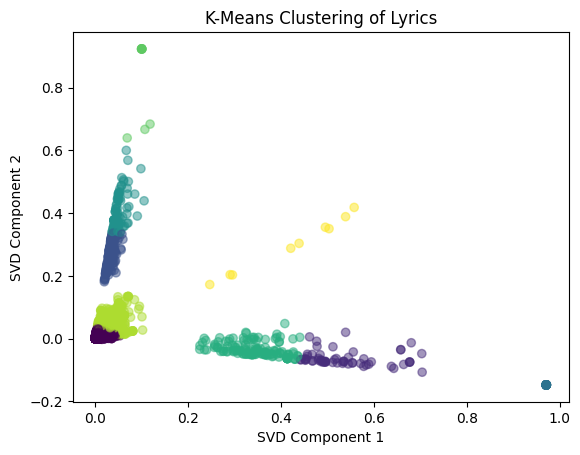

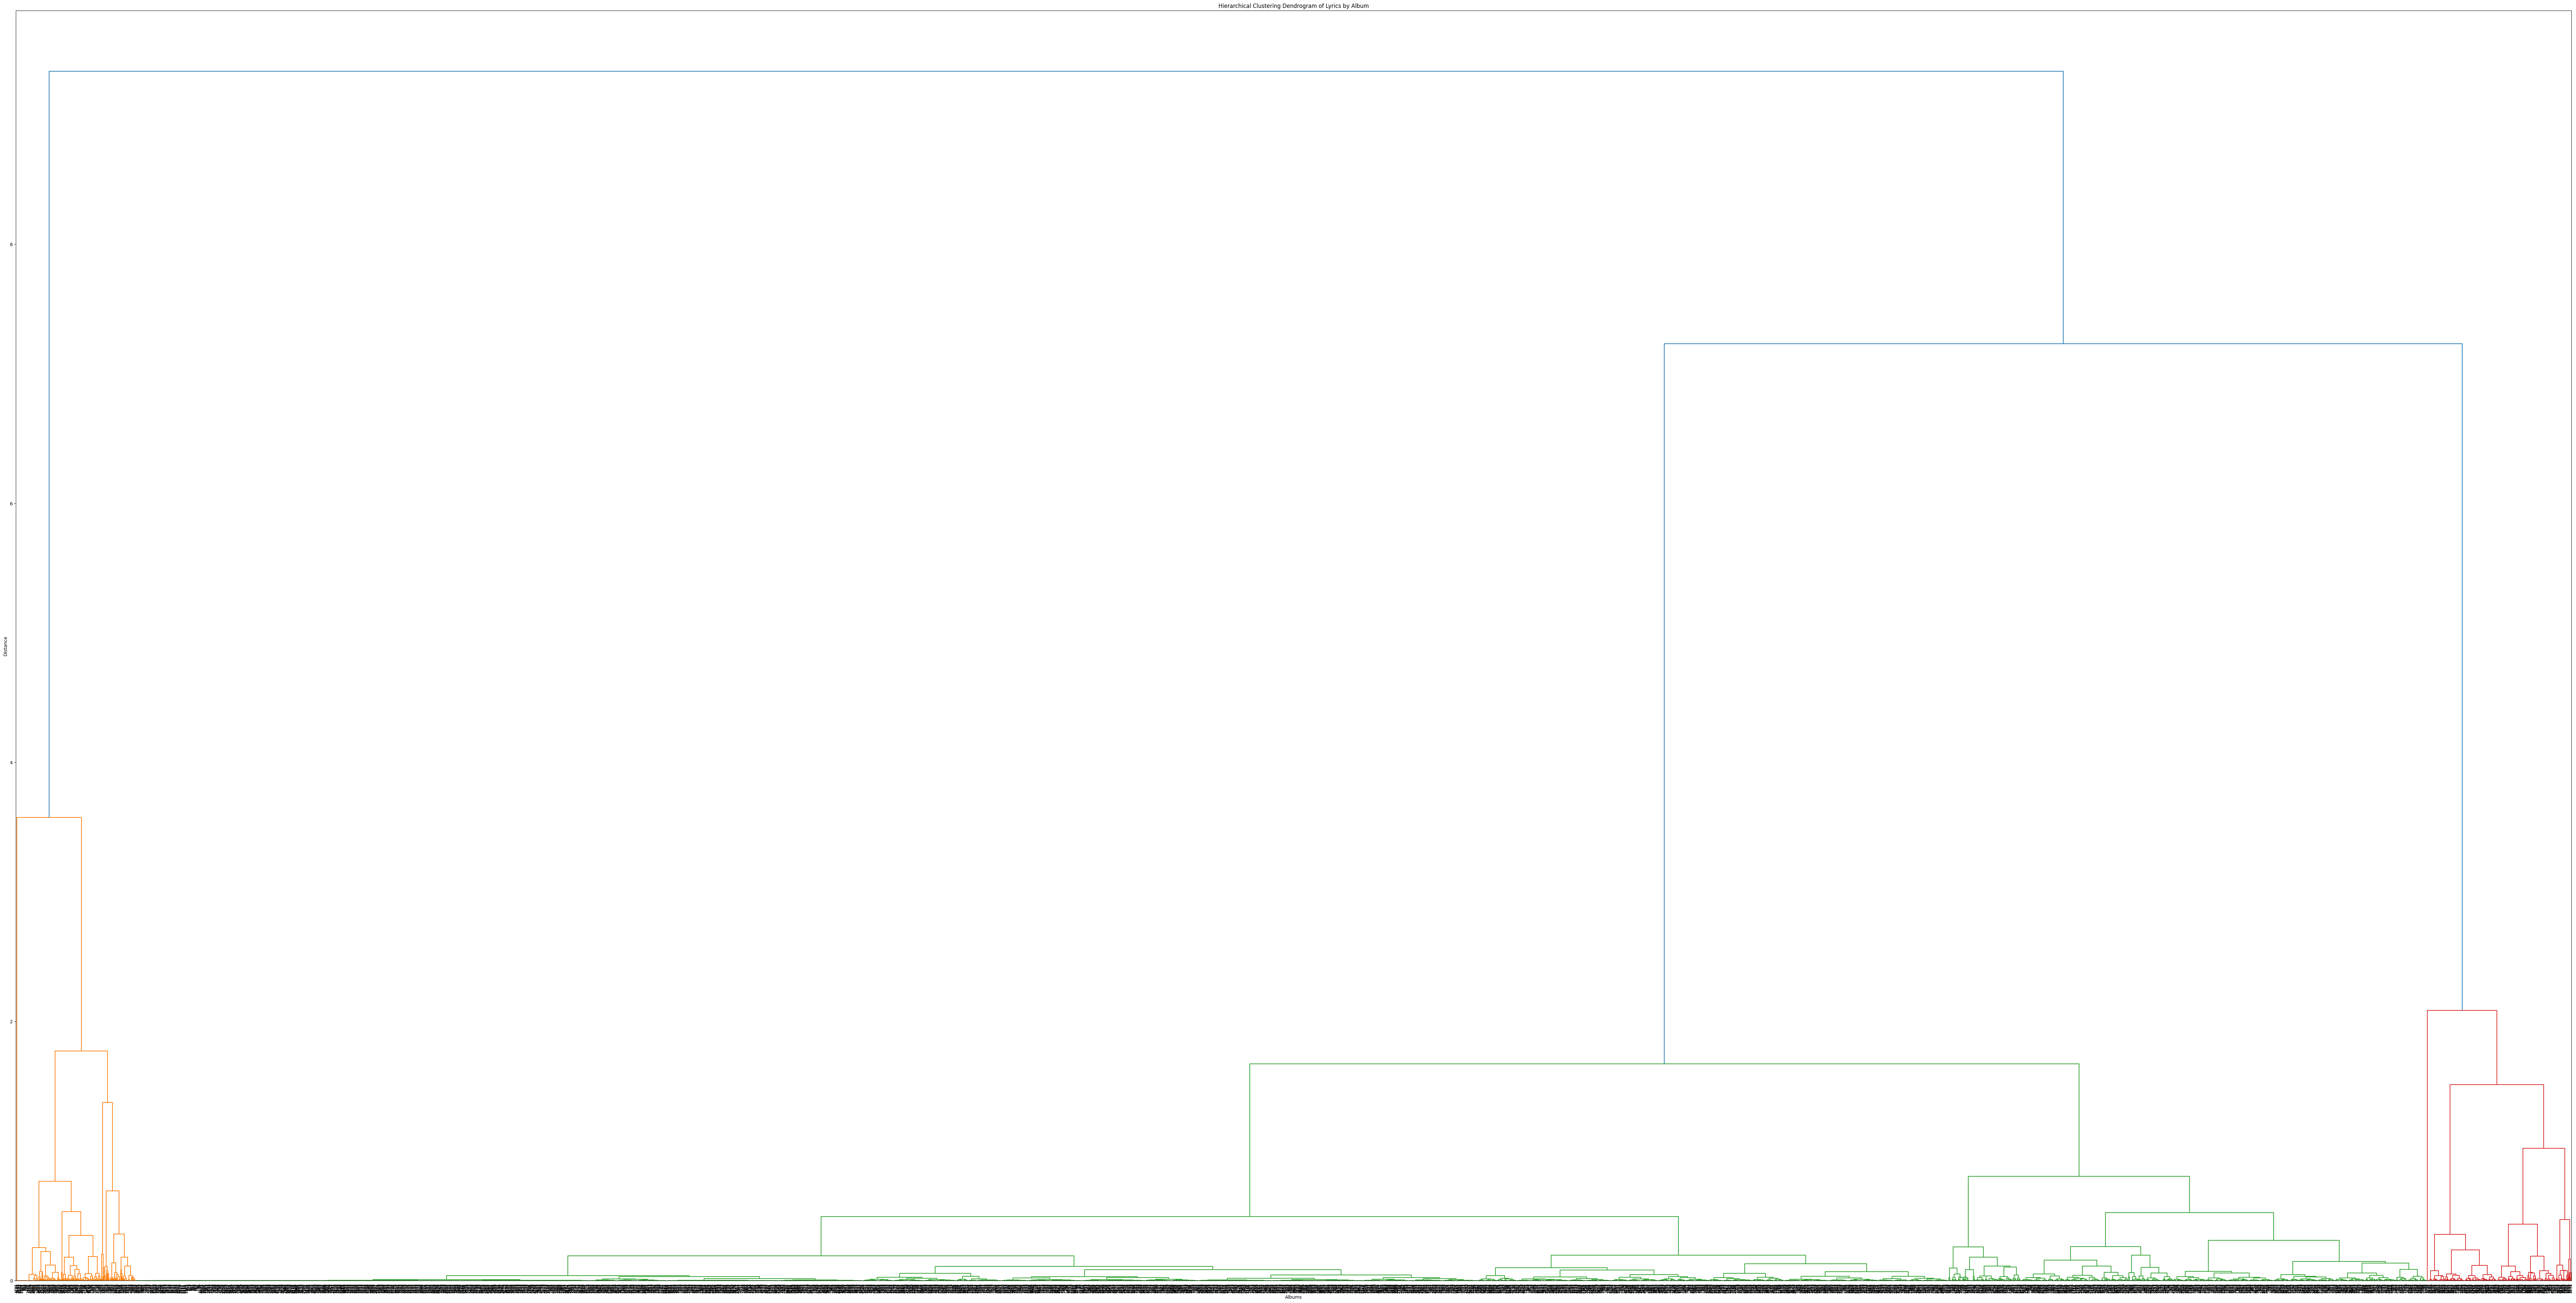

In [34]:
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Assuming you have a column 'lyrics' in your DataFrame
lyrics = df['lyric'].values
album = df['album'].unique()

# Vectorize the lyrics using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = vectorizer.fit_transform(lyrics)

# Apply Truncated SVD for dimensionality reduction
svd = TruncatedSVD(n_components=2, random_state=42)  # Using 2 components for visualization
tfidf_matrix_svd = svd.fit_transform(tfidf_matrix)

# Use K-Means clustering
kmeans = KMeans(n_clusters=9, random_state=42)
df['cluster'] = kmeans.fit_predict(tfidf_matrix_svd)

# Visualize the clusters
plt.scatter(tfidf_matrix_svd[:, 0], tfidf_matrix_svd[:, 1], c=df['cluster'], cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering of Lyrics')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.show()

# Perform hierarchical clustering
linkage_matrix = linkage(tfidf_matrix_svd, method='ward')

# Plot the dendrogram
plt.figure(figsize=(100, 50))
dendrogram(linkage_matrix, orientation='top', leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram of Lyrics by Album')
plt.xlabel('Albums')
plt.ylabel('Distance')
plt.show()

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming your dataset has columns 'lyrics' and 'album'
X = df['lyric']
y = df['album']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use TF-IDF for feature extraction
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Choose a classification model (Logistic Regression in this case)
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display additional classification metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.24375
Classification Report:
              precision    recall  f1-score   support

        1989       0.28      0.26      0.27        95
    Fearless       0.21      0.21      0.21       115
    Folklore       0.25      0.25      0.25        99
       Lover       0.26      0.28      0.27       119
         Red       0.14      0.16      0.15        82
   Speak Now       0.24      0.32      0.28       127
Taylor Swift       0.27      0.12      0.16        95
    evermore       0.30      0.33      0.31       123
  reputation       0.26      0.20      0.23       105

    accuracy                           0.24       960
   macro avg       0.24      0.24      0.24       960
weighted avg       0.25      0.24      0.24       960



Accuracy: 0.24375
Classification Report:
              precision    recall  f1-score   support

        1989       0.28      0.26      0.27        95
    Fearless       0.21      0.21      0.21       115
    Folklore       0.25      0.25      0.25        99
       Lover       0.26      0.28      0.27       119
         Red       0.14      0.16      0.15        82
   Speak Now       0.24      0.32      0.28       127
Taylor Swift       0.27      0.12      0.16        95
    evermore       0.30      0.33      0.31       123
  reputation       0.26      0.20      0.23       105

    accuracy                           0.24       960
   macro avg       0.24      0.24      0.24       960
weighted avg       0.25      0.24      0.24       960



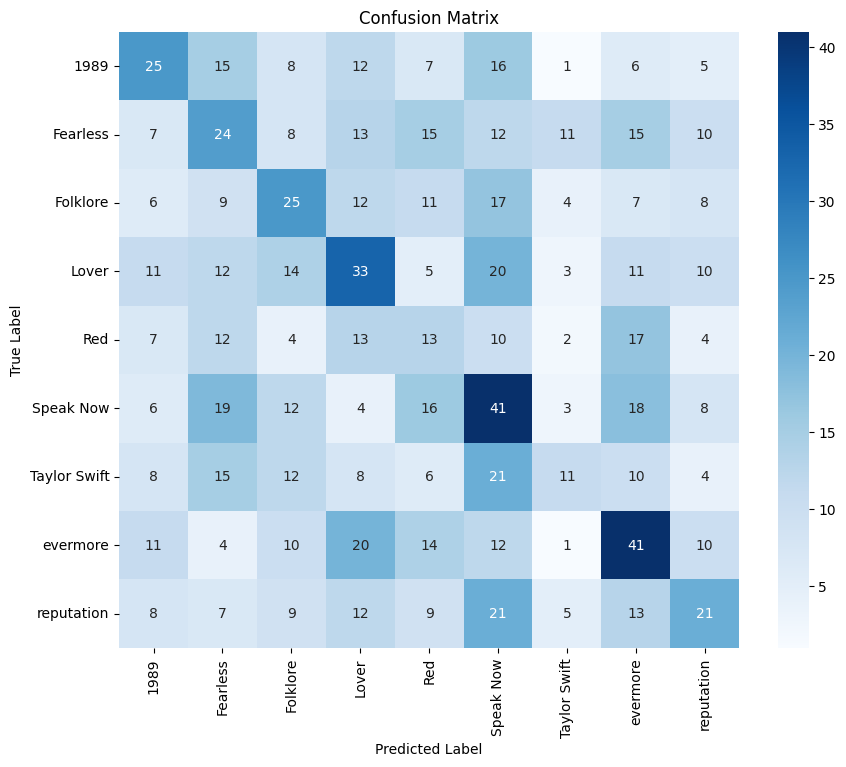

In [89]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display additional classification metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
